In [15]:
from pynq import Overlay
from pynq.lib.video import *
import cv2

base=Overlay("video.bit")

#base?

In [16]:
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode,PIXEL_RGB)

hdmi_in.start()
hdmi_out.start()

hdmi_in.tie(hdmi_out)

frame = hdmi_in.readframe()

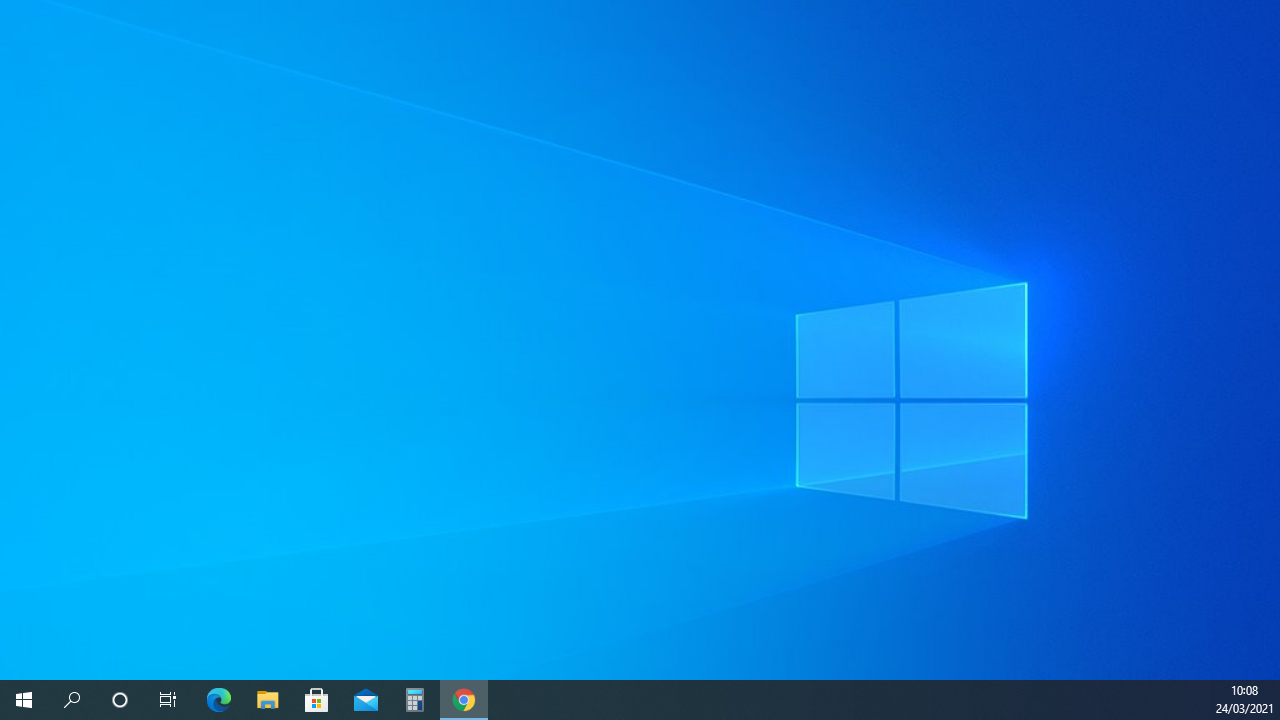

In [17]:
from pynq import allocate
import PIL.Image
import numpy as np
from IPython.display import display


original_image = PIL.Image.fromarray(frame)
pic_width, pic_height = original_image.size

display(original_image)
img_stream=np.asarray(original_image)

In [18]:
import numpy as np
from PIL import Image
from pynq import allocate

img=Image.open("4.bmp")

img = img.resize((hdmi_in.mode.width,hdmi_in.mode.height), Image.ANTIALIAS)
img_stream=np.asarray(img)

#in_buffer = allocate(shape=(hdmi_in.mode.height,hdmi_in.mode.width,3), dtype=np.uint8,cacheable=True)
#np.copyto(in_buffer,img_stream)

#print(img_stream)
outframe = hdmi_out.newframe()
cv2.Sobel(img_stream,-1,1,0,ksize=5,dst=outframe)
#outframe[:] =in_buffer
hdmi_out.writeframe(outframe)


In [19]:
import time
numframes = 10
grayscale = np.ndarray(shape=(hdmi_in.mode.height,hdmi_in.mode.width), dtype=np.uint8)
result = np.ndarray(shape=(hdmi_in.mode.height,hdmi_in.mode.width), dtype=np.uint8)

start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()    
    cv2.cvtColor(inframe,cv2.COLOR_RGB2GRAY,dst=grayscale)
    inframe.freebuffer()
    cv2.Laplacian(grayscale, cv2.CV_8U, dst=result)

    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2RGB,dst=outframe)
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  9.92364035396957


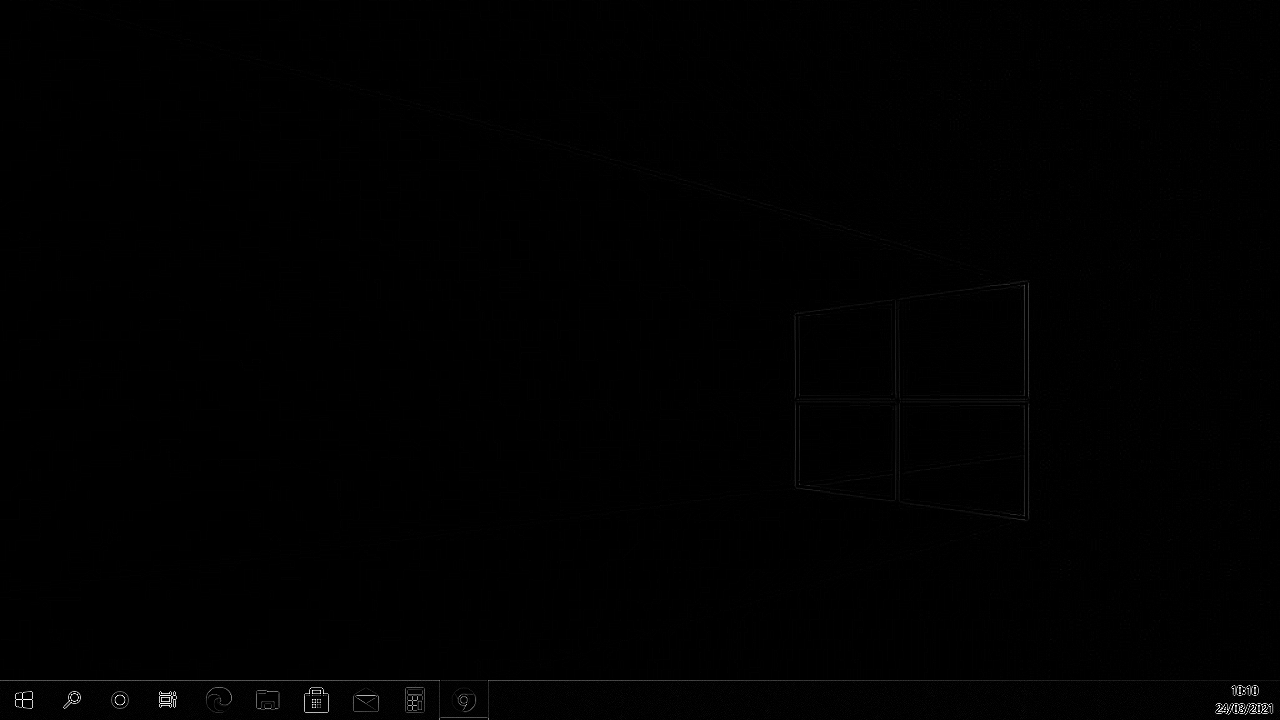

In [20]:
img = PIL.Image.fromarray(outframe)
display(img)

In [21]:
hdmi_out.stop()
hdmi_in.stop()

del hdmi_in, hdmi_out